In [1]:
import numpy as np 
import pandas as pd
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
from cdo import *
import os
import pymannkendall as mk
CDO = Cdo()

In [2]:
hours = [3,6,9,12,15,18,21]
h=['03','06','09','12','15','18','21']
path='../A_Stack_Yearwise/Stacks'
op_path = '../INDICES/CDD_Consecutive_Dry_Days'
for year in range(1998,2020):
    i=0
    for hour in hours:
        # file = open(f'{path}/{year}/{year}_{hour}_stack.nc','r')
        CDO.etccdi_cdd(input=f'{path}/{year}/{year}_{hour}_stack.nc',output=f'{op_path}/{year}/{year}_{h[i]}_cdd.nc')
        i=i+1


In [2]:
data = xr.open_dataset('../INDICES/CDD_Consecutive_Dry_Days/1998/1998_00_cdd.nc')

## Oth Hour

In [18]:
cdd = []
for year in range(1998,2020):
    data = xr.open_dataset(f'../INDICES/CDD_Consecutive_Dry_Days/{year}/{year}_00_cdd.nc')
    d = []
    for i in data['cddETCCDI'].values[0]:
        for j in i:
            if(str(j)=="NaT"):
                d.append(np.NaN)
            else:
                d.append(float(str(j).split(" ")[0])/8.64e+13)
    d = np.array(d).reshape(117,119)
    cdd.append(d)
cdd

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ..

In [22]:
len(cdd)

22

In [68]:
row=0
col=0
year=1
data_all_year_cdd = []
plot_data=[]
mk_test_all_values=[]
all_values_for_cdd_on_each_grid = []
for grids in cdd[0]:
    col=0
    for grid_point in grids:
        data_all_year_cdd = []
        # if(str(grid_point)!='nan'):
        data_all_year_cdd.append(grid_point)
        for index in range(1,22):
            # if(str(cdd[index][row][col])!='nan'):
            data_all_year_cdd.append(cdd[index][row][col])
        all_values_for_cdd_on_each_grid.append(data_all_year_cdd)
        try:
            op = mk.yue_wang_modification_test(data_all_year_cdd) 
            mk_test_all_values.append(op)
            if(op.trend=='increasing'):
                plot_data.append(1)
            elif(op.trend=='no trend'):
                plot_data.append(0)
            else:
                plot_data.append(-1)
        except:
            plot_data.append(np.nan)
            mk_test_all_values.append(np.nan)
        col = col + 1
    row = row + 1

In [69]:
plot_data = np.array(plot_data).reshape(117,119)

In [70]:
cdd_0_th_hour = xr.Dataset({
    "CDD_Yue_Wang_Results":(["lat","lon"],plot_data),
    # "Yue_Wang_test_values":(["x","y"],pd.DataFrame(mk_test_all_values))
},
coords={
    "lat":data['lat'].values,
    "lon":data['lon'].values,
    # "time": pd.date_range("2014-09-06", periods=3),
}
)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


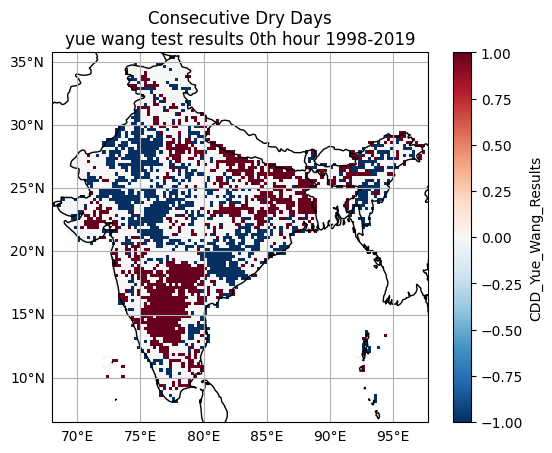

In [27]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False  
gl.ylabels_right = False 
gl.xlines = True 
gl.ylines = True 
# lats = data['lat'].values
# lons = data['lon'].values[:-2]
# ax.contourf(ds_21['Heavy_Precipitation_Yue_Wang_Results'])
# ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot.contourf(cmap="coolwarm")
cdd_0_th_hour['CDD_Yue_Wang_Results'].plot()

# ax.plot(lons,lats,color="#00000000")
# Plot data

# ax.scatter(lons, lats,transform=ccrs.PlateCarree())

# Customize and display the map
plt.title('Consecutive Dry Days\nyue wang test results 0th hour 1998-2019')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


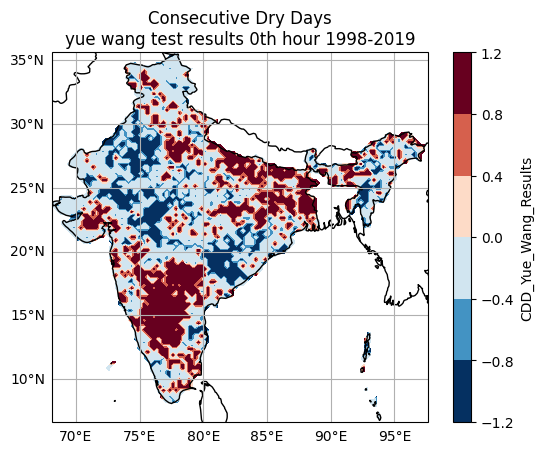

In [28]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False  
gl.ylabels_right = False 
gl.xlines = True 
gl.ylines = True 
# lats = data['lat'].values
# lons = data['lon'].values[:-2]
# ax.contourf(ds_21['Heavy_Precipitation_Yue_Wang_Results'])
# ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot.contourf(cmap="coolwarm")
cdd_0_th_hour['CDD_Yue_Wang_Results'].plot.contourf()

# ax.plot(lons,lats,color="#00000000")
# Plot data

# ax.scatter(lons, lats,transform=ccrs.PlateCarree())

# Customize and display the map
plt.title('Consecutive Dry Days\nyue wang test results 0th hour 1998-2019')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

## 3rd Hour

In [29]:
cdd = []
for year in range(1998,2020):
    data = xr.open_dataset(f'../INDICES/CDD_Consecutive_Dry_Days/{year}/{year}_03_cdd.nc')
    d = []
    for i in data['cddETCCDI'].values[0]:
        for j in i:
            if(str(j)=="NaT"):
                d.append(np.NaN)
            else:
                d.append(float(str(j).split(" ")[0])/8.64e+13)
    d = np.array(d).reshape(117,119)
    cdd.append(d)
cdd

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ..

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


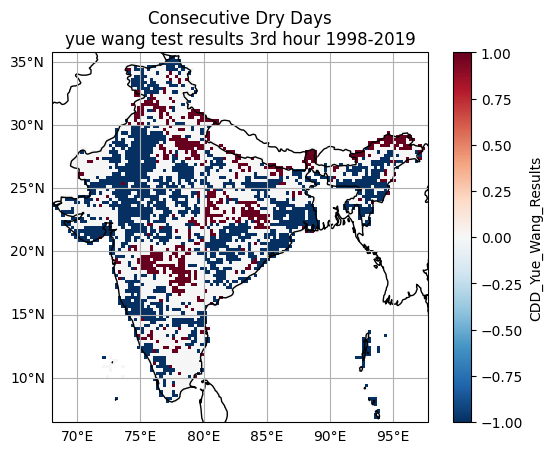

In [33]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False  
gl.ylabels_right = False 
gl.xlines = True 
gl.ylines = True 
# lats = data['lat'].values
# lons = data['lon'].values[:-2]
# ax.contourf(ds_21['Heavy_Precipitation_Yue_Wang_Results'])
# ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot.contourf(cmap="coolwarm")
cdd_0_th_hour['CDD_Yue_Wang_Results'].plot()

# ax.plot(lons,lats,color="#00000000")
# Plot data

# ax.scatter(lons, lats,transform=ccrs.PlateCarree())

# Customize and display the map
plt.title('Consecutive Dry Days\nyue wang test results 3rd hour 1998-2019')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


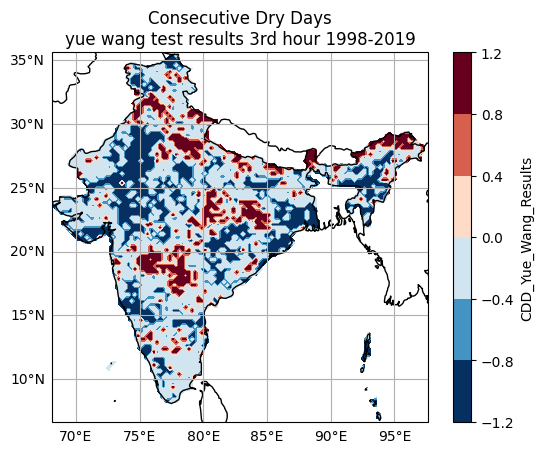

In [35]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False  
gl.ylabels_right = False 
gl.xlines = True 
gl.ylines = True 
# lats = data['lat'].values
# lons = data['lon'].values[:-2]
# ax.contourf(ds_21['Heavy_Precipitation_Yue_Wang_Results'])
# ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot.contourf(cmap="coolwarm")
cdd_0_th_hour['CDD_Yue_Wang_Results'].plot.contourf()

# ax.plot(lons,lats,color="#00000000")
# Plot data

# ax.scatter(lons, lats,transform=ccrs.PlateCarree())

# Customize and display the map
plt.title('Consecutive Dry Days\nyue wang test results 3rd hour 1998-2019')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

## 6th Hour

In [36]:
cdd = []
for year in range(1998,2020):
    data = xr.open_dataset(f'../INDICES/CDD_Consecutive_Dry_Days/{year}/{year}_06_cdd.nc')
    d = []
    for i in data['cddETCCDI'].values[0]:
        for j in i:
            if(str(j)=="NaT"):
                d.append(np.NaN)
            else:
                d.append(float(str(j).split(" ")[0])/8.64e+13)
    d = np.array(d).reshape(117,119)
    cdd.append(d)
cdd

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ..

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


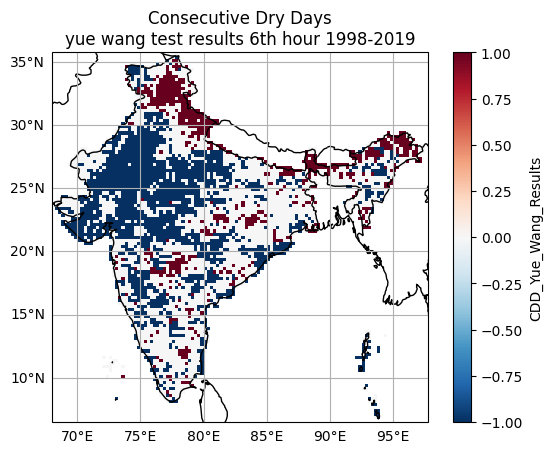

In [40]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False  
gl.ylabels_right = False 
gl.xlines = True 
gl.ylines = True 
# lats = data['lat'].values
# lons = data['lon'].values[:-2]
# ax.contourf(ds_21['Heavy_Precipitation_Yue_Wang_Results'])
# ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot.contourf(cmap="coolwarm")
cdd_0_th_hour['CDD_Yue_Wang_Results'].plot()

# ax.plot(lons,lats,color="#00000000")
# Plot data

# ax.scatter(lons, lats,transform=ccrs.PlateCarree())

# Customize and display the map
plt.title('Consecutive Dry Days\nyue wang test results 6th hour 1998-2019')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


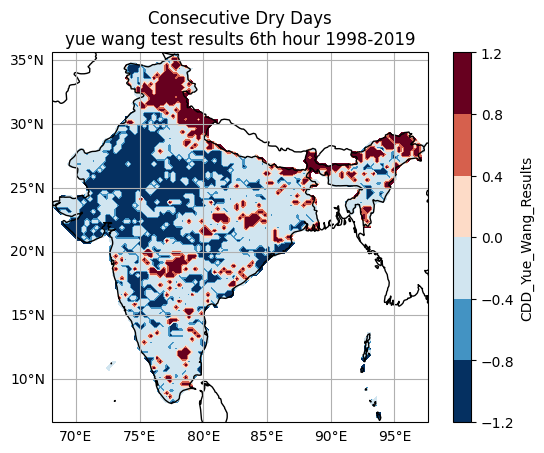

In [42]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False  
gl.ylabels_right = False 
gl.xlines = True 
gl.ylines = True 

cdd_0_th_hour['CDD_Yue_Wang_Results'].plot.contourf()


plt.title('Consecutive Dry Days\nyue wang test results 6th hour 1998-2019')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

## 9th Hour

In [43]:
cdd = []
for year in range(1998,2020):
    data = xr.open_dataset(f'../INDICES/CDD_Consecutive_Dry_Days/{year}/{year}_09_cdd.nc')
    d = []
    for i in data['cddETCCDI'].values[0]:
        for j in i:
            if(str(j)=="NaT"):
                d.append(np.NaN)
            else:
                d.append(float(str(j).split(" ")[0])/8.64e+13)
    d = np.array(d).reshape(117,119)
    cdd.append(d)
cdd

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ..

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


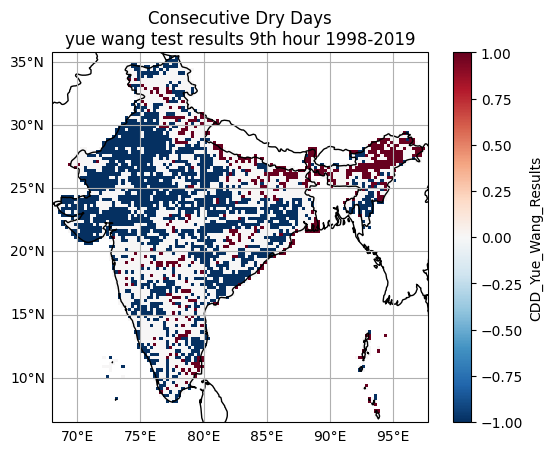

In [47]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False  
gl.ylabels_right = False 
gl.xlines = True 
gl.ylines = True 

cdd_0_th_hour['CDD_Yue_Wang_Results'].plot()


plt.title('Consecutive Dry Days\nyue wang test results 9th hour 1998-2019')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


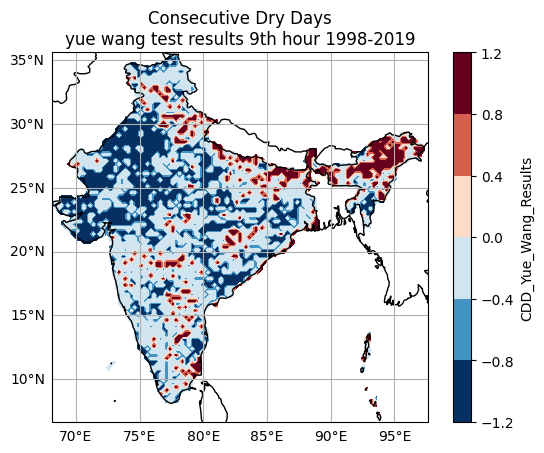

In [48]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False  
gl.ylabels_right = False 
gl.xlines = True 
gl.ylines = True 

cdd_0_th_hour['CDD_Yue_Wang_Results'].plot.contourf()


plt.title('Consecutive Dry Days\nyue wang test results 9th hour 1998-2019')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

## 12th Hour

In [49]:
cdd = []
for year in range(1998,2020):
    data = xr.open_dataset(f'../INDICES/CDD_Consecutive_Dry_Days/{year}/{year}_12_cdd.nc')
    d = []
    for i in data['cddETCCDI'].values[0]:
        for j in i:
            if(str(j)=="NaT"):
                d.append(np.NaN)
            else:
                d.append(float(str(j).split(" ")[0])/8.64e+13)
    d = np.array(d).reshape(117,119)
    cdd.append(d)
cdd

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ..

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


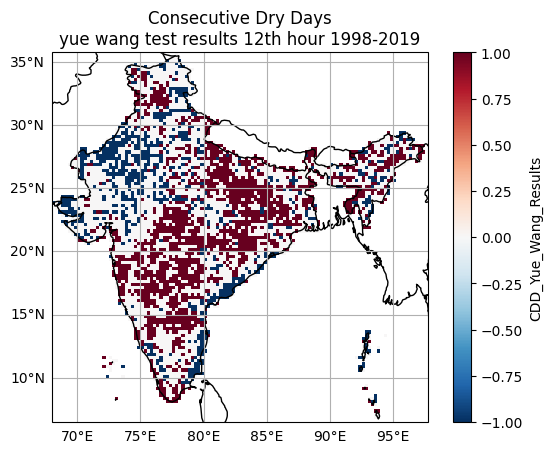

In [53]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False  
gl.ylabels_right = False 
gl.xlines = True 
gl.ylines = True 

cdd_0_th_hour['CDD_Yue_Wang_Results'].plot()


plt.title('Consecutive Dry Days\nyue wang test results 12th hour 1998-2019')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


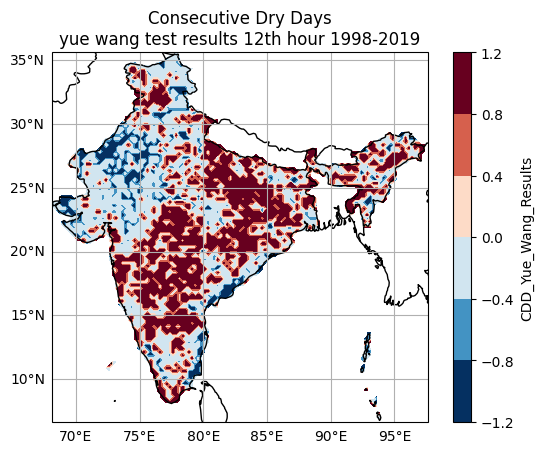

In [54]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False  
gl.ylabels_right = False 
gl.xlines = True 
gl.ylines = True 

cdd_0_th_hour['CDD_Yue_Wang_Results'].plot.contourf()


plt.title('Consecutive Dry Days\nyue wang test results 12th hour 1998-2019')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

## 15th Hour

In [55]:
cdd = []
for year in range(1998,2020):
    data = xr.open_dataset(f'../INDICES/CDD_Consecutive_Dry_Days/{year}/{year}_15_cdd.nc')
    d = []
    for i in data['cddETCCDI'].values[0]:
        for j in i:
            if(str(j)=="NaT"):
                d.append(np.NaN)
            else:
                d.append(float(str(j).split(" ")[0])/8.64e+13)
    d = np.array(d).reshape(117,119)
    cdd.append(d)
cdd

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ..

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


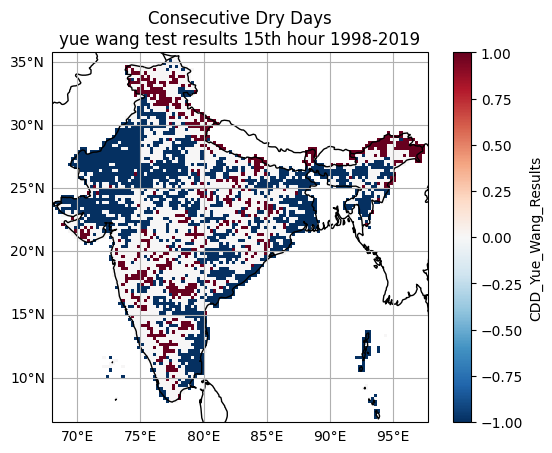

In [59]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False  
gl.ylabels_right = False 
gl.xlines = True 
gl.ylines = True 

cdd_0_th_hour['CDD_Yue_Wang_Results'].plot()


plt.title('Consecutive Dry Days\nyue wang test results 15th hour 1998-2019')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


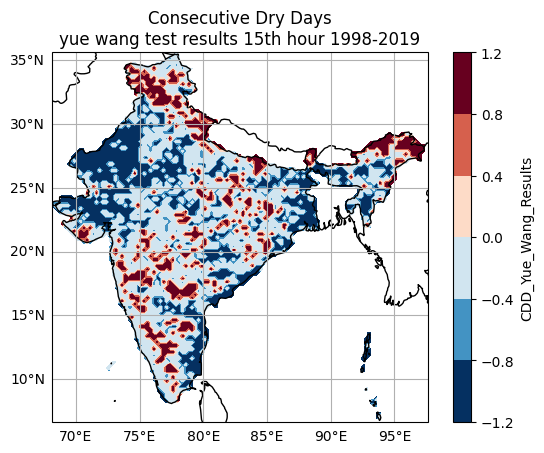

In [60]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False  
gl.ylabels_right = False 
gl.xlines = True 
gl.ylines = True 

cdd_0_th_hour['CDD_Yue_Wang_Results'].plot.contourf()


plt.title('Consecutive Dry Days\nyue wang test results 15th hour 1998-2019')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

## 18th Hour

In [61]:
cdd = []
for year in range(1998,2020):
    data = xr.open_dataset(f'../INDICES/CDD_Consecutive_Dry_Days/{year}/{year}_18_cdd.nc')
    d = []
    for i in data['cddETCCDI'].values[0]:
        for j in i:
            if(str(j)=="NaT"):
                d.append(np.NaN)
            else:
                d.append(float(str(j).split(" ")[0])/8.64e+13)
    d = np.array(d).reshape(117,119)
    cdd.append(d)
cdd

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ..

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


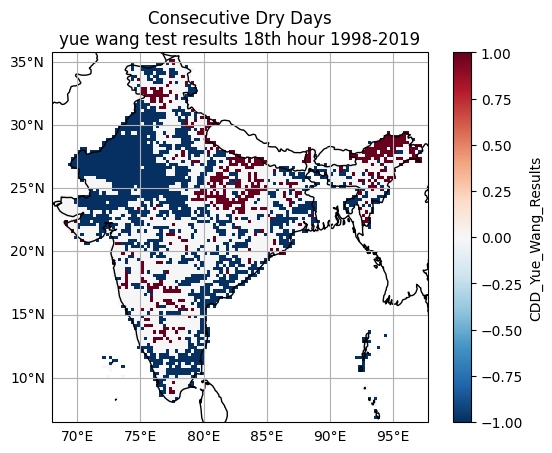

In [65]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False  
gl.ylabels_right = False 
gl.xlines = True 
gl.ylines = True 

cdd_0_th_hour['CDD_Yue_Wang_Results'].plot()


plt.title('Consecutive Dry Days\nyue wang test results 18th hour 1998-2019')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


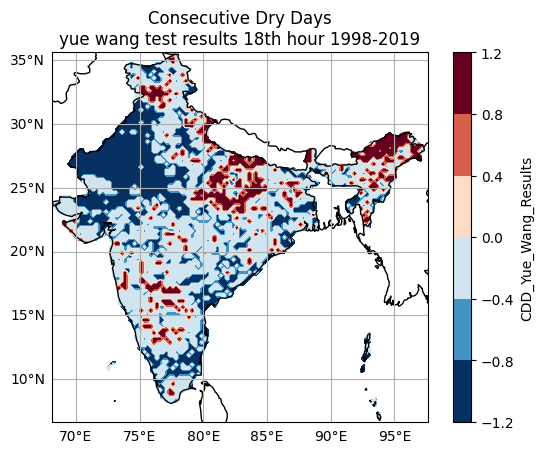

In [66]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False  
gl.ylabels_right = False 
gl.xlines = True 
gl.ylines = True 

cdd_0_th_hour['CDD_Yue_Wang_Results'].plot.contourf()


plt.title('Consecutive Dry Days\nyue wang test results 18th hour 1998-2019')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

## 21st Hour

In [67]:
cdd = []
for year in range(1998,2020):
    data = xr.open_dataset(f'../INDICES/CDD_Consecutive_Dry_Days/{year}/{year}_21_cdd.nc')
    d = []
    for i in data['cddETCCDI'].values[0]:
        for j in i:
            if(str(j)=="NaT"):
                d.append(np.NaN)
            else:
                d.append(float(str(j).split(" ")[0])/8.64e+13)
    d = np.array(d).reshape(117,119)
    cdd.append(d)
cdd

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ..

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


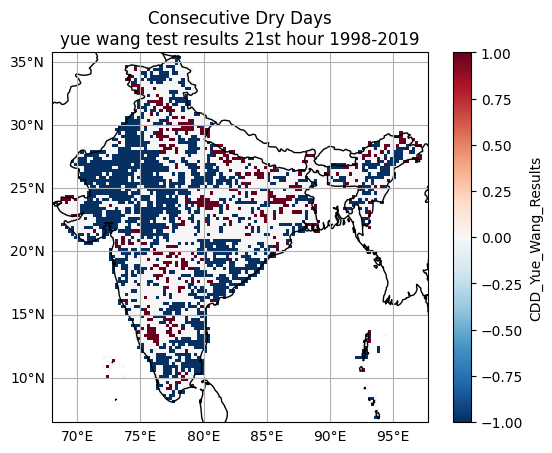

In [73]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False  
gl.ylabels_right = False 
gl.xlines = True 
gl.ylines = True 

cdd_0_th_hour['CDD_Yue_Wang_Results'].plot()


plt.title('Consecutive Dry Days\nyue wang test results 21st hour 1998-2019')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


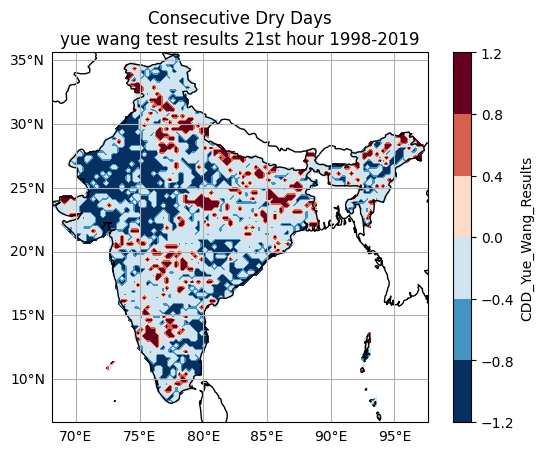

In [74]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature

# Create a map using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False  
gl.ylabels_right = False 
gl.xlines = True 
gl.ylines = True 

cdd_0_th_hour['CDD_Yue_Wang_Results'].plot.contourf()


plt.title('Consecutive Dry Days\nyue wang test results 21st hour 1998-2019')
plt.show()
# turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

In [99]:
increasing_count = []
decreasing_count = []

## Mann Kendall Test

In [100]:
def SenSlope(max_1_day_prec):
    row=0
    col=0
    count=[]
    data_all_year_max_1_day_prec = []
    plot_data=[]
    intercept_plot=[]
    mk_test_all_values=[]
    all_values_for_max_1_day_prec_on_each_grid = []
    for grids in max_1_day_prec[0]:
        col=0
        for grid_point in grids:
            data_all_year_max_1_day_prec = []
            # if(str(grid_point)!='nan'):
            data_all_year_max_1_day_prec.append(grid_point)
            for index in range(1,len(max_1_day_prec)):
                # if(str(max_1_day_prec[index][row][col])!='nan'):
                data_all_year_max_1_day_prec.append(max_1_day_prec[index][row][col])
            all_values_for_max_1_day_prec_on_each_grid.append(data_all_year_max_1_day_prec)
            try:
                slope,intercept = mk.sens_slope(data_all_year_max_1_day_prec) 
                plot_data.append(slope)
                intercept_plot.append(intercept)
                count.append(slope)
            except:
                plot_data.append(np.nan)
                intercept_plot.append(np.nan)
                mk_test_all_values.append(np.nan)
            col = col + 1
        row = row + 1
    plot_data = np.array(plot_data).reshape(117,119)
    intercept_plot = np.array(intercept_plot).reshape(117,119)
    plot_data = xr.Dataset({
    "CDD_Man_Kendall_Results":(["lat","lon"],plot_data),
    # "Yue_Wang_test_values":(["x","y"],pd.DataFrame(mk_test_all_values))
},
coords={
    "lat":data['lat'].values,
    "lon":data['lon'].values,
    # "time": pd.date_range("2014-09-06", periods=3),
}
)
    
    intercept_plot = xr.Dataset({
    "CDD_Man_Kendall_Results":(["lat","lon"],intercept_plot),
    # "Yue_Wang_test_values":(["x","y"],pd.DataFrame(mk_test_all_values))
},
coords={
    "lat":data['lat'].values,
    "lon":data['lon'].values,
    # "time": pd.date_range("2014-09-06", periods=3),
}
)
    return plot_data,intercept_plot,count

In [4]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature
def PlotGraph(plot_data,test="Men Kendall",hour="0th",cmap=""):
    # Create a map using PlateCarree projection
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

    # Add map features
    ax.coastlines()
    ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = False  
    gl.ylabels_right = False 
    gl.xlines = True 
    gl.ylines = True 
    lats = data['lat'].values
    lons = data['lon'].values[:-2]
    # ax.contourf(ds_21['Heavy_Precipitation_Yue_Wang_Results'])
    # ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot.contourf(cmap="coolwarm")
    if cmap != "":
        plot_data['CDD_Man_Kendall_Results'].plot(cmap=cmap)
    else:
        plot_data['CDD_Man_Kendall_Results'].plot(cmap="seismic_r")
    # ax.plot(lons,lats,color="#00000000")
    # Plot data

    # ax.scatter(lons, lats,transform=ccrs.PlateCarree())

    # Customize and display the map
    plt.title(f'Consecutive Dry Days\n{test} results {hour} hour 2020-2023')
    plt.show()
    # turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

In [5]:
def ManKendallTest(max_1_day_prec):
    row=0
    col=0
    year=1
    data_all_year_max_1_day_prec = []
    plot_data=[]
    mk_test_all_values=[]
    all_values_for_max_1_day_prec_on_each_grid = []
    for grids in max_1_day_prec[0]:
        col=0
        for grid_point in grids:
            data_all_year_max_1_day_prec = []
            # if(str(grid_point)!='nan'):
            data_all_year_max_1_day_prec.append(grid_point)
            for index in range(1,len(max_1_day_prec)):
                # if(str(max_1_day_prec[index][row][col])!='nan'):
                data_all_year_max_1_day_prec.append(max_1_day_prec[index][row][col])
            all_values_for_max_1_day_prec_on_each_grid.append(data_all_year_max_1_day_prec)
            try:
                op = mk.original_test(data_all_year_max_1_day_prec,alpha=0.01) 
                mk_test_all_values.append(op)
                # plot_data.append(op.h)
                if(op.trend=='increasing'):
                    plot_data.append(1)
                elif(op.trend=='no trend'):
                    plot_data.append(0)
                elif(op.trend=='decreasing'):
                    plot_data.append(-1)
            except:
                plot_data.append(np.nan)
                mk_test_all_values.append(np.nan)
            col = col + 1
        row = row + 1
    plot_data = np.array(plot_data).reshape(117,119)
    plot_data = xr.Dataset({
    "CDD_Man_Kendall_Results":(["lat","lon"],plot_data),
    # "Yue_Wang_test_values":(["x","y"],pd.DataFrame(mk_test_all_values))
},
coords={
    "lat":data['lat'].values,
    "lon":data['lon'].values,
    # "time": pd.date_range("2014-09-06", periods=3),
}
)
    return plot_data

In [101]:
def LoadData(hour):
    cdd = []
    for year in range(1998,2020):
        data = xr.open_dataset(f'../INDICES/CDD_Consecutive_Dry_Days/{year}/{year}_{hour}_cdd.nc')
        d = []
        for i in data['cddETCCDI'].values[0]:
            for j in i:
                if(str(j)=="NaT"):
                    d.append(np.NaN)
                else:
                    d.append(float(str(j).split(" ")[0])/8.64e+13)
        d = np.array(d).reshape(117,119)
        cdd.append(d)
    return cdd

In [67]:
def CountGrids(count):
    p=0
    n=0 
    nn=0
    o=0
    for i in count:
        if i>0:
            p=p+1
        elif i<0:
            n=n+1
        elif i==0:
            o=o+1
        elif str(i)=='nan':
            nn=nn+1
    increasing_count.append(p)
    decreasing_count.append(-n)
    print(f'p={p},n={-n},nn={nn},o={o}\nTotal = {p+n+nn+o}')

## 0th Hour

In [102]:
cdd = []
for year in range(1998,2020):
    data = xr.open_dataset(f'../INDICES/CDD_Consecutive_Dry_Days/{year}/{year}_00_cdd.nc')
    d = []
    for i in data['cddETCCDI'].values[0]:
        for j in i:
            if(str(j)=="NaT"):
                d.append(np.NaN)
            else:
                d.append(float(str(j).split(" ")[0])/8.64e+13)
    d = np.array(d).reshape(117,119)
    cdd.append(d)
cdd

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ..

In [8]:
plot_data = ManKendallTest(cdd)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


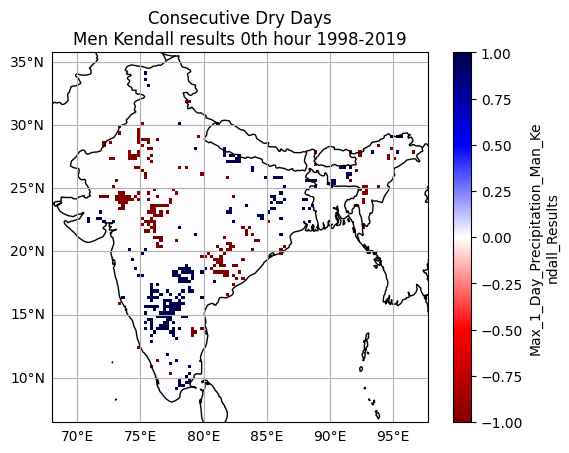

In [9]:
PlotGraph(plot_data)

In [103]:
plot_data,intercept_plot,count = SenSlope(cdd)

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:180: RuntimeWarning: All-NaN slice encountered
  slope = np.nanmedian(__sens_estimator(x))
/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:181: RuntimeWarning: All-NaN slice encountered
  intercept = np.nanmedian(x) - np.median(np.arange(n)[~np.isnan(x.flatten())]) * slope  # or median(x) - (n-1)/2 *slope
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


############

In [46]:
count

[0.4666666666666667,
 0.5555555555555556,
 0.16666666666666666,
 0.2,
 0.23809523809523808,
 0.2,
 0.4,
 0.1875,
 0.5454545454545454,
 0.125,
 0.1111111111111111,
 0.75,
 0.16666666666666666,
 0.3333333333333333,
 0.4,
 0.3333333333333333,
 0.2,
 0.625,
 0.4,
 0.3333333333333333,
 0.2,
 0.2857142857142857,
 0.16666666666666666,
 0.13333333333333333,
 0.07692307692307693,
 0.25,
 0.09090909090909091,
 0.3333333333333333,
 0.05,
 0.8571428571428571,
 0.7272727272727273,
 0.07142857142857142,
 0.2,
 0.08333333333333333,
 0.0625,
 0.1111111111111111,
 0.3333333333333333,
 0.06666666666666667,
 0.13333333333333333,
 0.05,
 0.6,
 0.2222222222222222,
 0.5882352941176471,
 0.3333333333333333,
 0.4,
 0.4,
 0.8,
 0.5,
 0.6,
 0.5,
 0.3333333333333333,
 0.06666666666666667,
 0.42857142857142855,
 0.16666666666666666,
 0.2,
 0.4166666666666667,
 0.14285714285714285,
 0.6,
 0.07142857142857142,
 0.35,
 0.2,
 0.07692307692307693,
 0.45454545454545453,
 0.4,
 0.125,
 0.75,
 0.125,
 0.1111111111111111,

In [52]:
len(count)

14441

In [104]:
CountGrids(count)

p=2102,n=-2048,nn=9047,o=726
Total = 13923


In [70]:
decreasing_count

[-4328]

<BarContainer object of 1 artists>

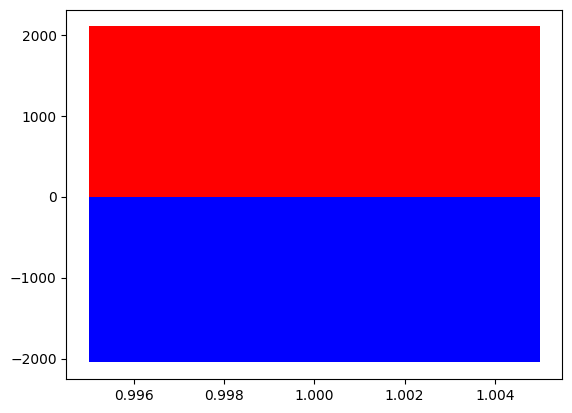

In [105]:
x = 1
negative_data = [-1,-4,-3,-2,-6,-2,-8,-9]
positive_data = [4,2,3,1,4,6,7,8]

fig = plt.figure()
ax = plt.subplot(111)
ax.bar(x, increasing_count, width=0.01, color='r')
ax.bar(x, decreasing_count, width=0.01, color='b')

#################

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


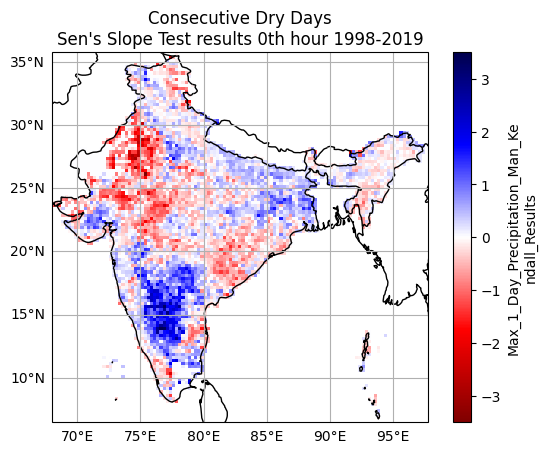

In [11]:
PlotGraph(plot_data,test="Sen\'s Slope Test")

## 3rd Hour


In [106]:
cdd = LoadData(hour="03")
cdd

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ..

In [107]:
len(cdd)

22

In [23]:
plot_data = ManKendallTest(cdd)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


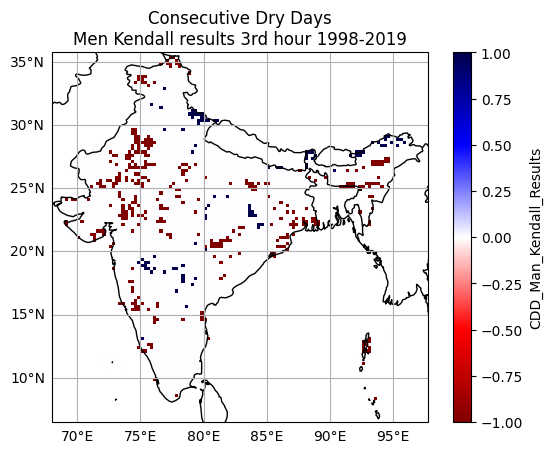

In [24]:
PlotGraph(plot_data,hour="3rd")

In [108]:
plot_data,intercept_plot,count = SenSlope(cdd)

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:180: RuntimeWarning: All-NaN slice encountered
  slope = np.nanmedian(__sens_estimator(x))
/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:181: RuntimeWarning: All-NaN slice encountered
  intercept = np.nanmedian(x) - np.median(np.arange(n)[~np.isnan(x.flatten())]) * slope  # or median(x) - (n-1)/2 *slope
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [109]:
CountGrids(count)

p=1308,n=-2749,nn=9047,o=819
Total = 13923


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


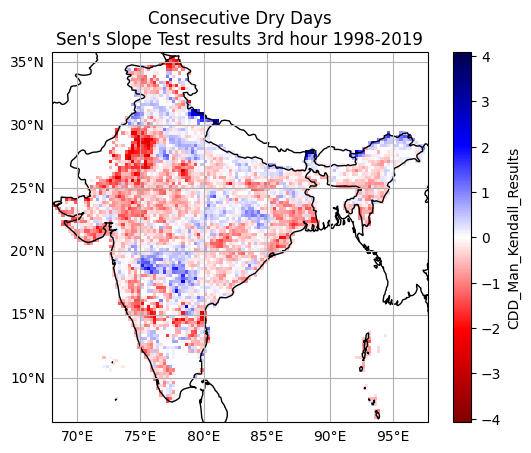

In [28]:
PlotGraph(plot_data,test="Sen\'s Slope Test",hour="3rd")

## 6th Hour

In [111]:
cdd = LoadData(hour="06")
cdd

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ..

In [81]:
plot_data = ManKendallTest(cdd)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


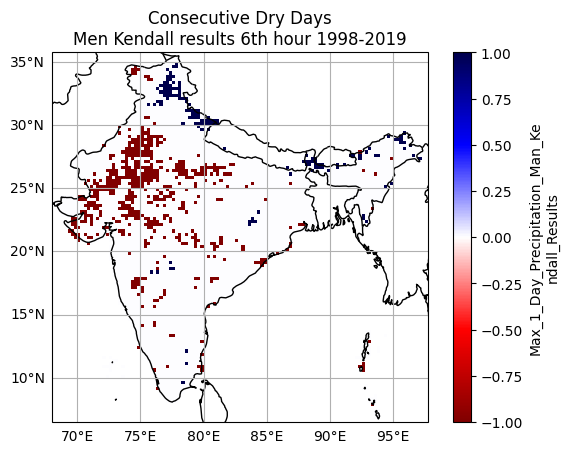

In [82]:
PlotGraph(plot_data,hour="6th")

In [112]:
plot_data,intercept_plot,count = SenSlope(cdd)

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:180: RuntimeWarning: All-NaN slice encountered
  slope = np.nanmedian(__sens_estimator(x))
/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:181: RuntimeWarning: All-NaN slice encountered
  intercept = np.nanmedian(x) - np.median(np.arange(n)[~np.isnan(x.flatten())]) * slope  # or median(x) - (n-1)/2 *slope
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [113]:
CountGrids(count)

p=1331,n=-2818,nn=9047,o=727
Total = 13923


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


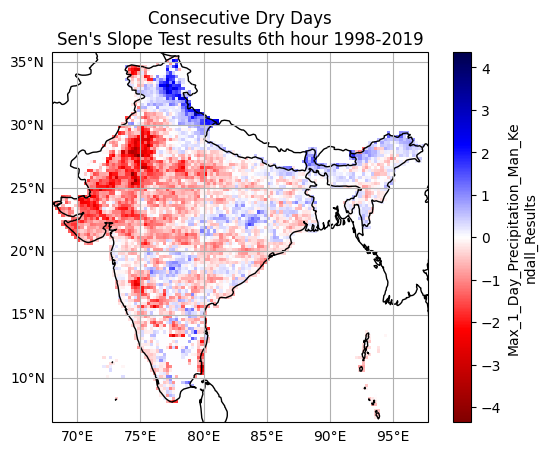

In [84]:
PlotGraph(plot_data,test="Sen\'s Slope Test",hour="6th")

## 9th Hour

In [114]:
cdd = LoadData(hour="09")
cdd

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ..

In [86]:
plot_data = ManKendallTest(cdd)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


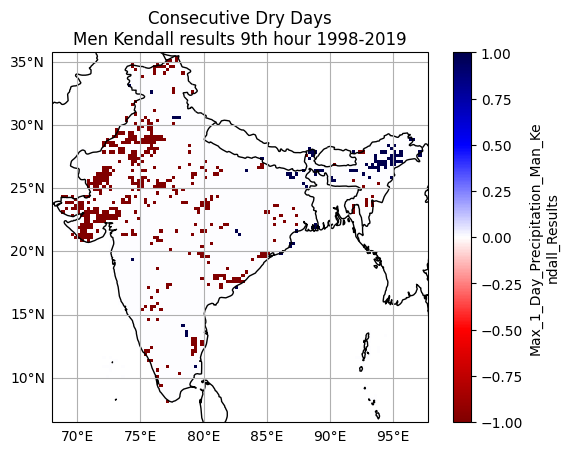

In [87]:
PlotGraph(plot_data,hour="9th")

In [115]:
plot_data,intercept_plot,count = SenSlope(cdd)

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:180: RuntimeWarning: All-NaN slice encountered
  slope = np.nanmedian(__sens_estimator(x))
/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:181: RuntimeWarning: All-NaN slice encountered
  intercept = np.nanmedian(x) - np.median(np.arange(n)[~np.isnan(x.flatten())]) * slope  # or median(x) - (n-1)/2 *slope
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [116]:
CountGrids(count)

p=1238,n=-3033,nn=9047,o=605
Total = 13923


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


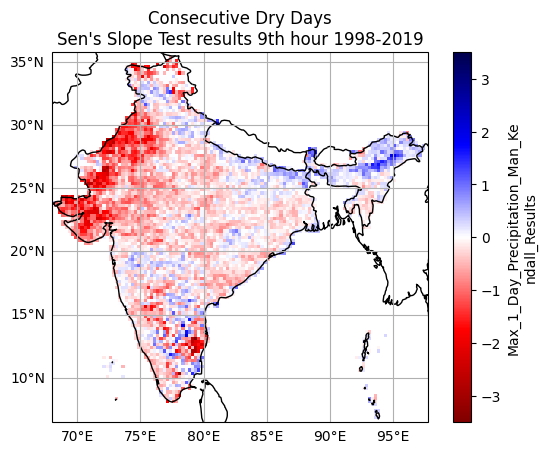

In [40]:
PlotGraph(plot_data,test="Sen\'s Slope Test",hour="9th")

## 12th Hour

In [117]:
cdd = LoadData(hour="12")
cdd

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ..

In [90]:
plot_data = ManKendallTest(cdd)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


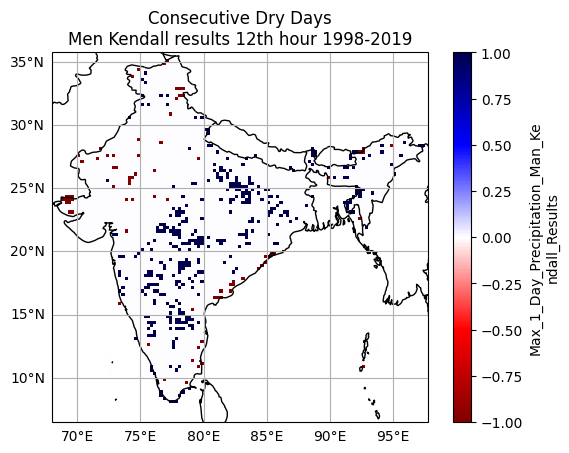

In [91]:
PlotGraph(plot_data,hour="12th")

In [118]:
plot_data,intercept_plot,count = SenSlope(cdd)

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:180: RuntimeWarning: All-NaN slice encountered
  slope = np.nanmedian(__sens_estimator(x))
/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:181: RuntimeWarning: All-NaN slice encountered
  intercept = np.nanmedian(x) - np.median(np.arange(n)[~np.isnan(x.flatten())]) * slope  # or median(x) - (n-1)/2 *slope
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [119]:
CountGrids(count)

p=2641,n=-1591,nn=9047,o=644
Total = 13923


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


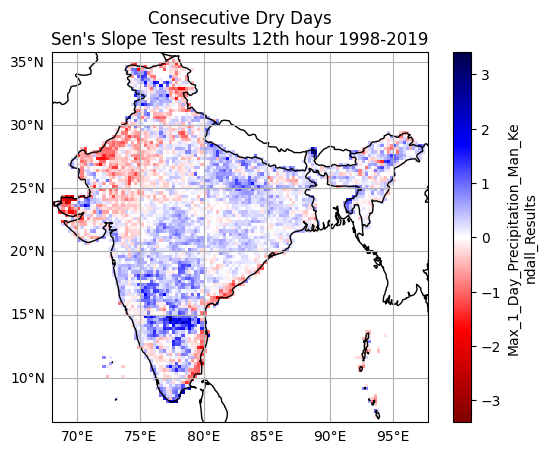

In [93]:
PlotGraph(plot_data,test="Sen\'s Slope Test",hour="12th")

## 15th Hour

In [120]:
cdd = LoadData(hour="15")
cdd

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ..

In [95]:
plot_data = ManKendallTest(cdd)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


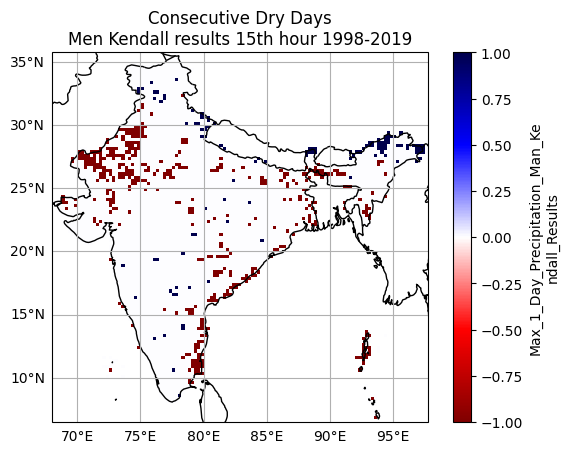

In [96]:
PlotGraph(plot_data,hour="15th")

In [121]:
plot_data,intercept_plot,count = SenSlope(cdd)

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:180: RuntimeWarning: All-NaN slice encountered
  slope = np.nanmedian(__sens_estimator(x))
/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:181: RuntimeWarning: All-NaN slice encountered
  intercept = np.nanmedian(x) - np.median(np.arange(n)[~np.isnan(x.flatten())]) * slope  # or median(x) - (n-1)/2 *slope
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [122]:
CountGrids(count)

p=1434,n=-2821,nn=9047,o=621
Total = 13923


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


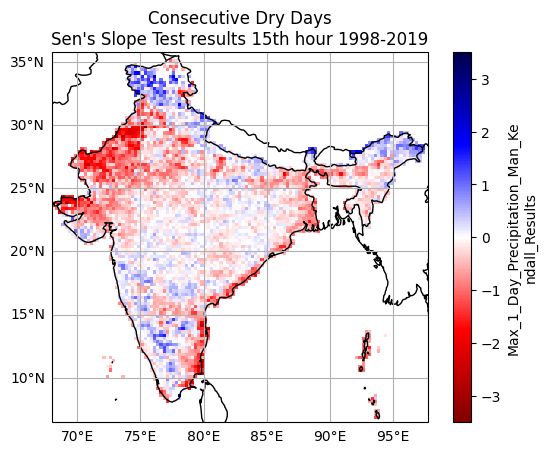

In [98]:
PlotGraph(plot_data,test="Sen\'s Slope Test",hour="15th")

## 18th Hour

In [123]:
cdd = LoadData(hour="18")
cdd

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ..

In [100]:
plot_data = ManKendallTest(cdd)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


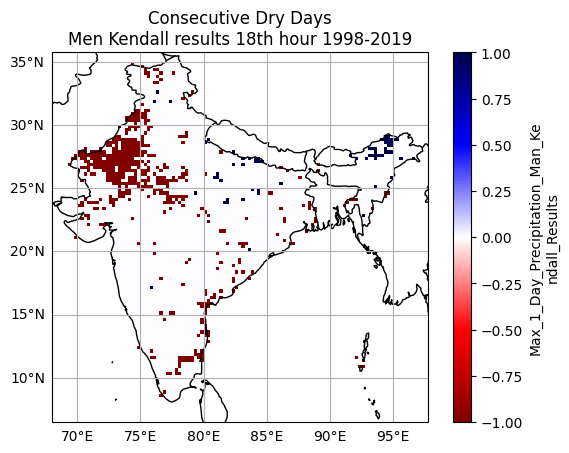

In [101]:
PlotGraph(plot_data,hour="18th")

In [124]:
plot_data,intercept_plot,count = SenSlope(cdd)

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:180: RuntimeWarning: All-NaN slice encountered
  slope = np.nanmedian(__sens_estimator(x))
/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:181: RuntimeWarning: All-NaN slice encountered
  intercept = np.nanmedian(x) - np.median(np.arange(n)[~np.isnan(x.flatten())]) * slope  # or median(x) - (n-1)/2 *slope
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [125]:
CountGrids(count)

p=1310,n=-2968,nn=9047,o=598
Total = 13923


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


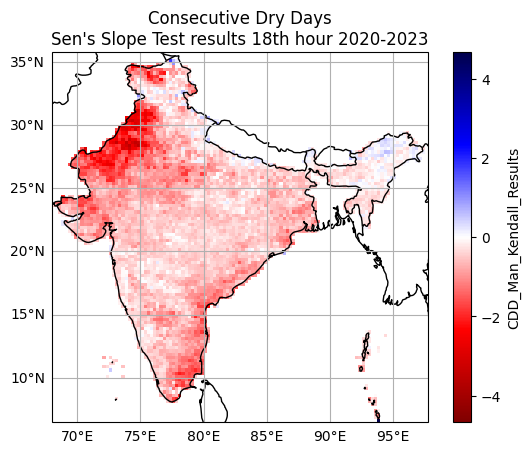

In [89]:
PlotGraph(plot_data,test="Sen\'s Slope Test",hour="18th")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


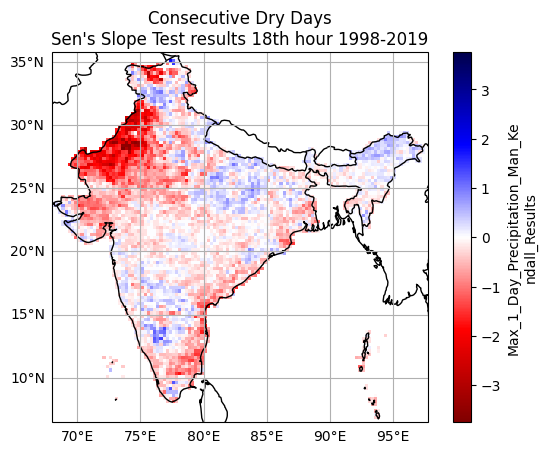

In [103]:
PlotGraph(plot_data,test="Sen\'s Slope Test",hour="18th")

## 21st Hour

In [126]:
cdd = LoadData(hour="21")
cdd

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ..

In [105]:
plot_data = ManKendallTest(cdd)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


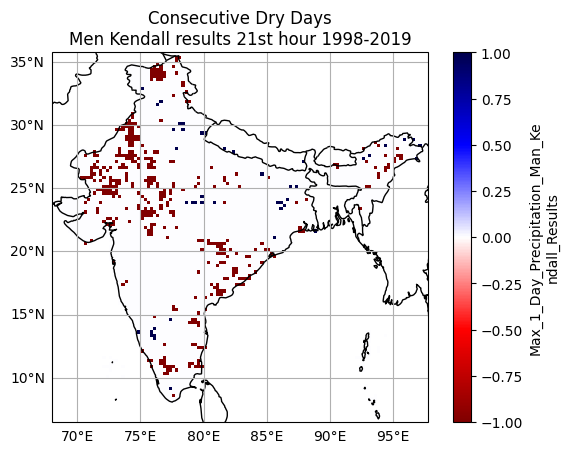

In [106]:
PlotGraph(plot_data,hour="21st")

In [127]:
plot_data,intercept_plot,count = SenSlope(cdd)

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:180: RuntimeWarning: All-NaN slice encountered
  slope = np.nanmedian(__sens_estimator(x))
/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:181: RuntimeWarning: All-NaN slice encountered
  intercept = np.nanmedian(x) - np.median(np.arange(n)[~np.isnan(x.flatten())]) * slope  # or median(x) - (n-1)/2 *slope
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [128]:
CountGrids(count)

p=1209,n=-2944,nn=9047,o=723
Total = 13923


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


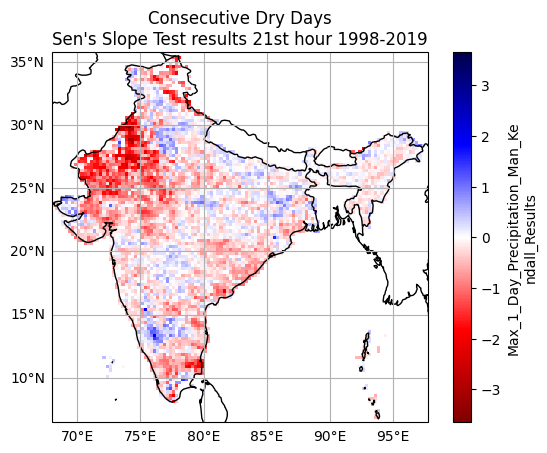

In [108]:
PlotGraph(plot_data,test="Sen\'s Slope Test",hour="21st")

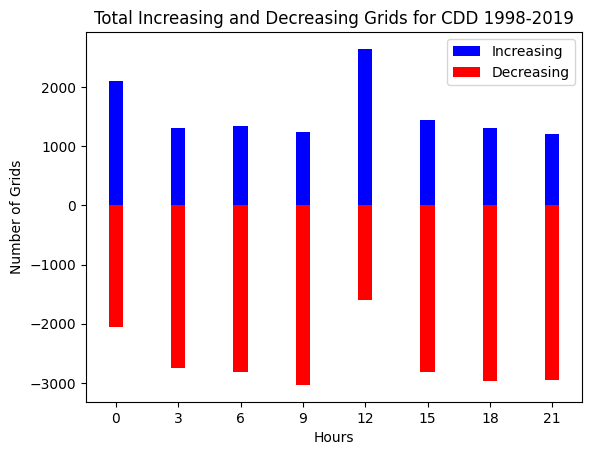

In [138]:
x = [0,3,6,9,12,15,18,21]

fig = plt.figure()
ax = plt.subplot(111)
plt.xticks(x)
ax.bar(x, increasing_count, width=0.7, color='b')
ax.bar(x, decreasing_count, width=0.7, color='r')
plt.xlabel("Hours")
plt.ylabel("Number of Grids")
plt.title("Total Increasing and Decreasing Grids for CDD 1998-2019")
plt.legend({'Increasing':'blue','Decreasing':'red'})

# With GPM Data

## 0th Hour

In [12]:
cdd = LoadData("00")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Lib

In [13]:
len(cdd)

26

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


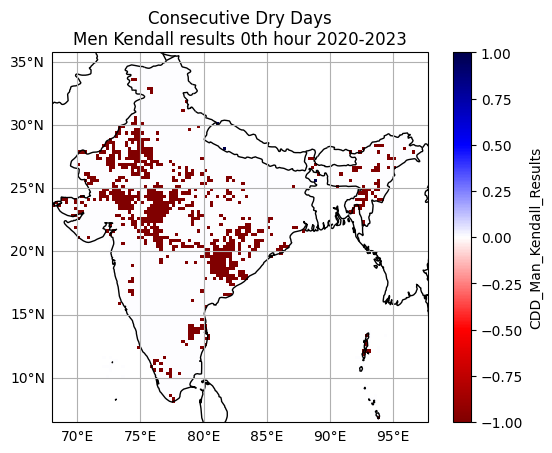

In [14]:
plot_data = ManKendallTest(cdd)

PlotGraph(plot_data)

In [53]:
for i in plot_data['Max_1_Day_Precipitation_Man_Kendall_Results'].values:
    for j in i:
        print(j)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
0.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
0.0
-1.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:180: RuntimeWarning: All-NaN slice encountered
  slope = np.nanmedian(__sens_estimator(x))
/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:181: RuntimeWarning: All-NaN slice encountered
  intercept = np.nanmedian(x) - np.median(np.arange(n)[~np.isnan(x.flatten())]) * slope  # or median(x) - (n-1)/2 *slope
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarni

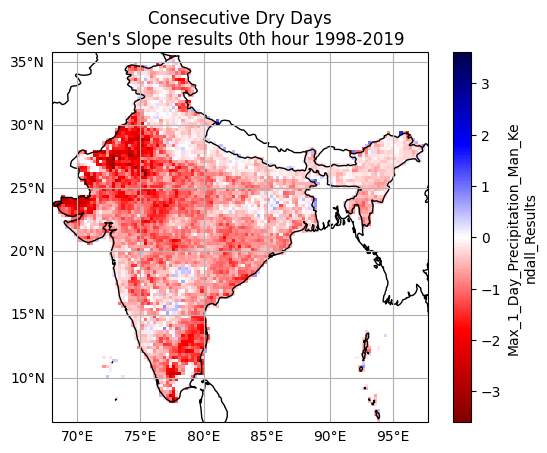

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


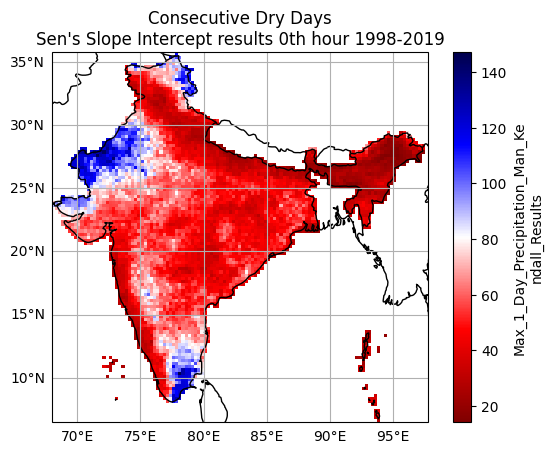

In [58]:
plot_data,intercept_plot = SenSlope(cdd)

PlotGraph(plot_data,test="Sen\'s Slope")

PlotGraph(intercept_plot,test="Sen\'s Slope Intercept")

## 3rd Hour

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Lib

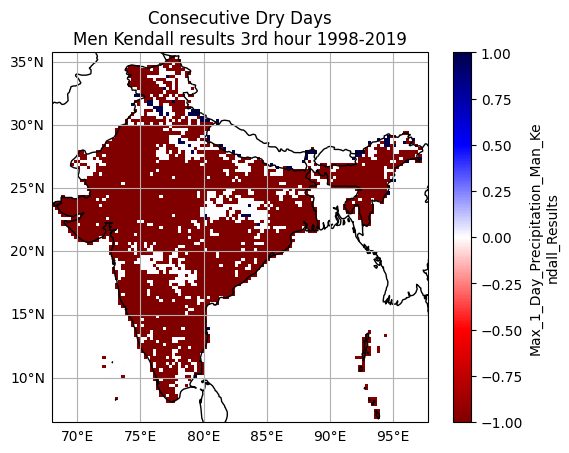

In [59]:
cdd = LoadData("03")
# cdd

plot_data = ManKendallTest(cdd)

PlotGraph(plot_data,hour="3rd")

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:180: RuntimeWarning: All-NaN slice encountered
  slope = np.nanmedian(__sens_estimator(x))
/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:181: RuntimeWarning: All-NaN slice encountered
  intercept = np.nanmedian(x) - np.median(np.arange(n)[~np.isnan(x.flatten())]) * slope  # or median(x) - (n-1)/2 *slope
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarni

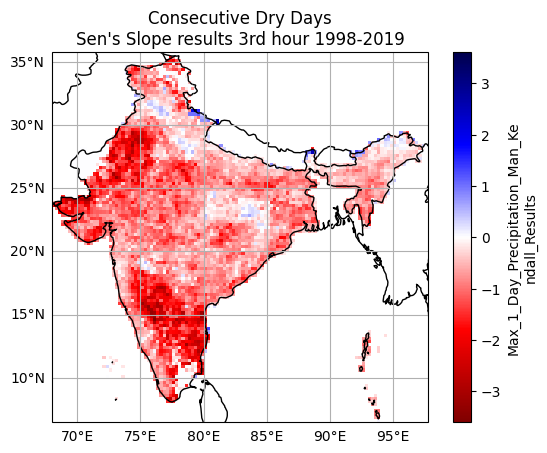

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


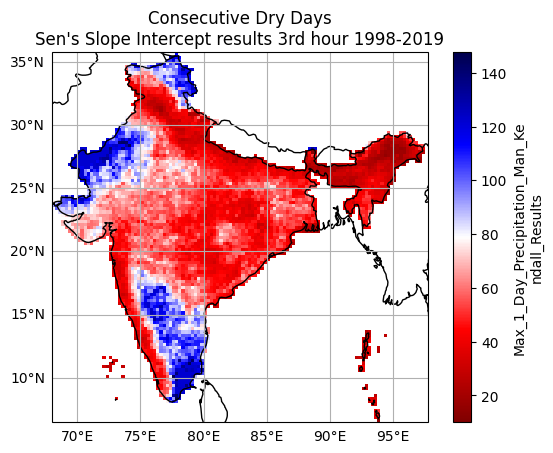

In [20]:
plot_data,intercept_plot = SenSlope(cdd)

PlotGraph(plot_data,test="Sen\'s Slope",hour="3rd")

PlotGraph(intercept_plot,test="Sen\'s Slope Intercept",hour="3rd")

## 6th Hour

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Lib

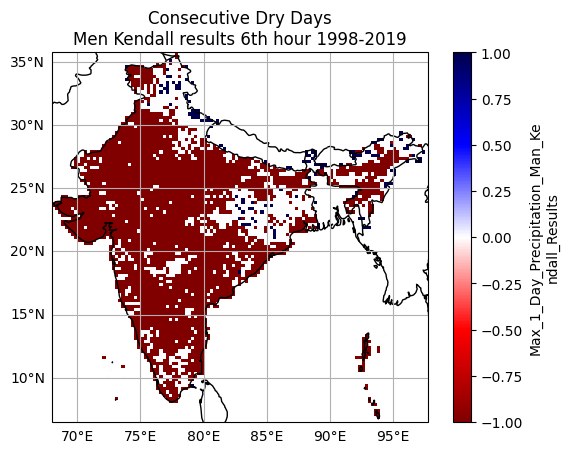

In [60]:
cdd = LoadData("06")
# cdd
plot_data = ManKendallTest(cdd)
PlotGraph(plot_data,hour="6th")

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:180: RuntimeWarning: All-NaN slice encountered
  slope = np.nanmedian(__sens_estimator(x))
/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:181: RuntimeWarning: All-NaN slice encountered
  intercept = np.nanmedian(x) - np.median(np.arange(n)[~np.isnan(x.flatten())]) * slope  # or median(x) - (n-1)/2 *slope
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarni

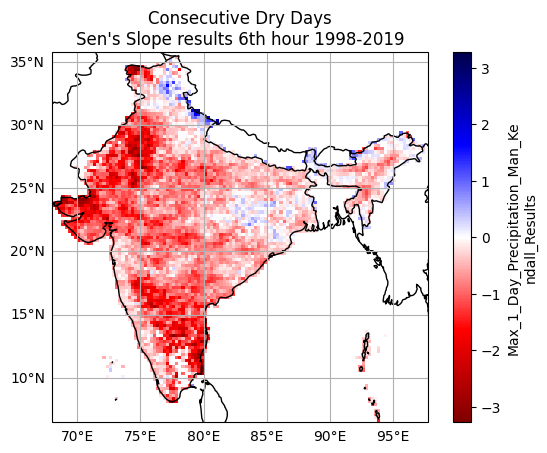

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


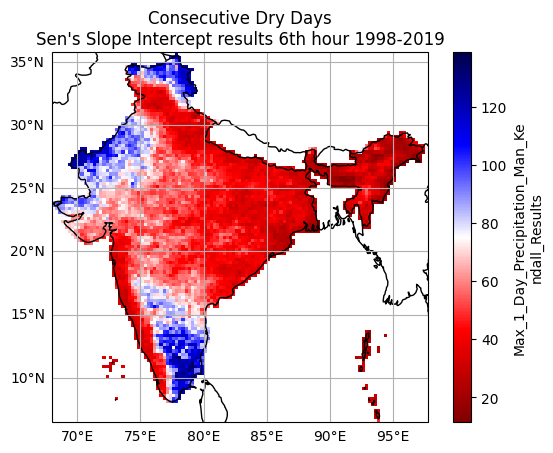

In [22]:
plot_data,intercept_plot = SenSlope(cdd)
PlotGraph(plot_data,test="Sen\'s Slope",hour="6th")
PlotGraph(intercept_plot,test="Sen\'s Slope Intercept",hour="6th")

## 9th Hour

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Lib

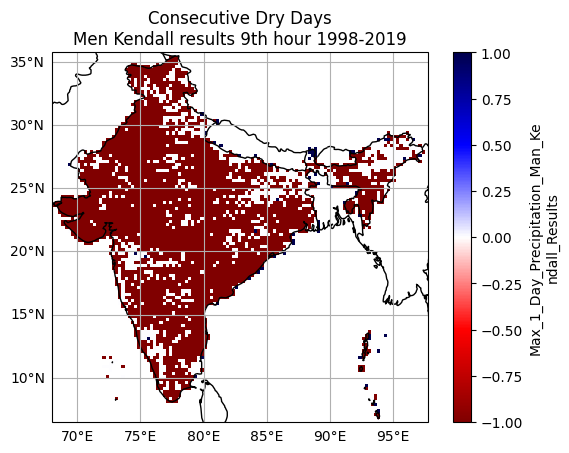

In [61]:
cdd = LoadData("09")
plot_data = ManKendallTest(cdd)
PlotGraph(plot_data,hour="9th")

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:180: RuntimeWarning: All-NaN slice encountered
  slope = np.nanmedian(__sens_estimator(x))
/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:181: RuntimeWarning: All-NaN slice encountered
  intercept = np.nanmedian(x) - np.median(np.arange(n)[~np.isnan(x.flatten())]) * slope  # or median(x) - (n-1)/2 *slope
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarni

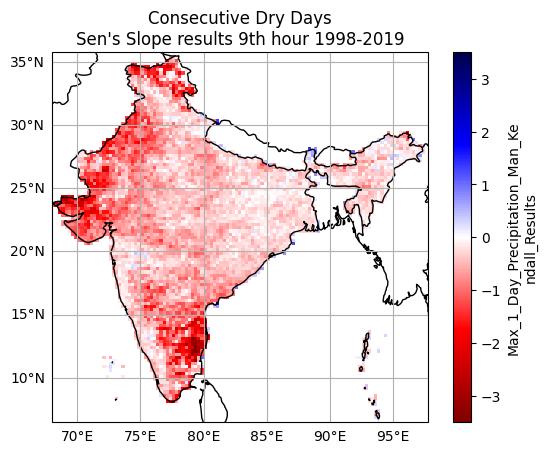

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


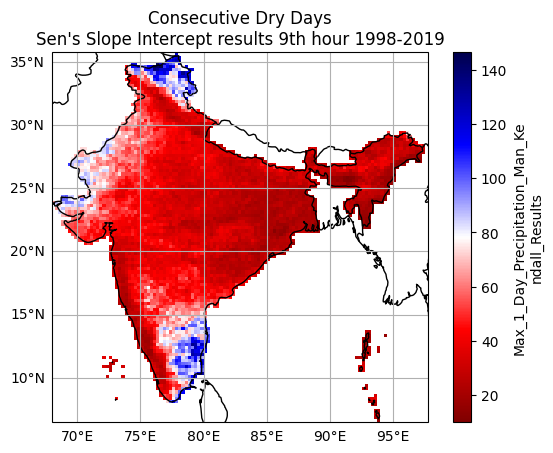

In [24]:
plot_data,intercept_plot = SenSlope(cdd)
PlotGraph(plot_data,test="Sen\'s Slope",hour="9th")
PlotGraph(intercept_plot,test="Sen\'s Slope Intercept",hour="9th")

## 12th Hour

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Lib

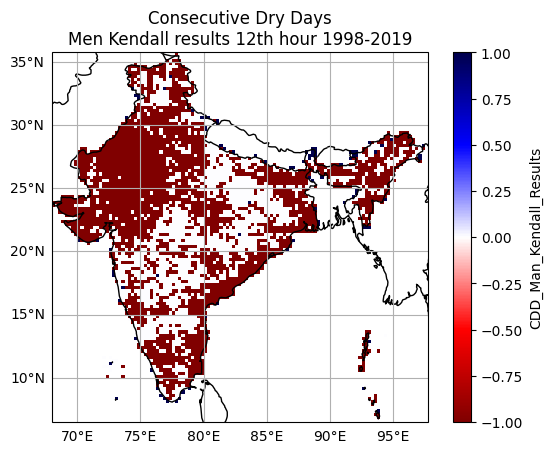

In [11]:
cdd = LoadData("12")
plot_data = ManKendallTest(cdd)
PlotGraph(plot_data,hour="12th")

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:180: RuntimeWarning: All-NaN slice encountered
  slope = np.nanmedian(__sens_estimator(x))
/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:181: RuntimeWarning: All-NaN slice encountered
  intercept = np.nanmedian(x) - np.median(np.arange(n)[~np.isnan(x.flatten())]) * slope  # or median(x) - (n-1)/2 *slope
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarni

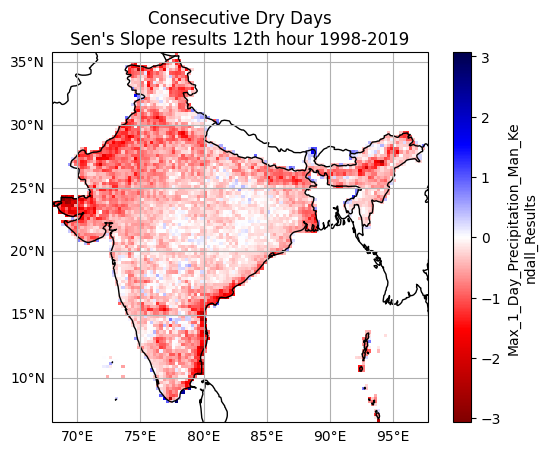

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


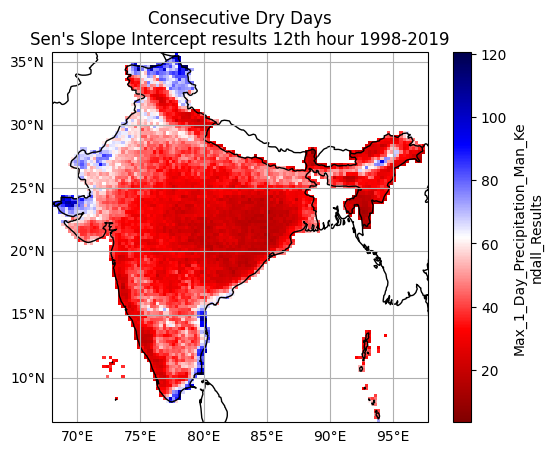

In [39]:
plot_data,intercept_plot = SenSlope(cdd)
PlotGraph(plot_data,test="Sen\'s Slope",hour="12th")
PlotGraph(intercept_plot,test="Sen\'s Slope Intercept",hour="12th")

## GPM Original Resolution

In [17]:
def LoadData(hour):
    cdd = []
    for year in range(2020,2024):
        data = xr.open_dataset(f'../GPM_Original_Res_Stacks/CDD_Consecutive_Dry_Days/{year}_{hour}_cdd.nc')
        d = []
        for i in data['cddETCCDI'].values[0]:
            for j in i:
                if(str(j)=="NaT"):
                    d.append(np.NaN)
                else:
                    d.append(float(str(j).split(" ")[0])/8.64e+13)
        d = np.array(d).reshape(289,294)
        cdd.append(d)
    return cdd

In [73]:
def ManKendallTest(max_1_day_prec):
    row=0
    col=0
    year=1
    data_all_year_max_1_day_prec = []
    plot_data=[]
    mk_test_all_values=[]
    all_values_for_max_1_day_prec_on_each_grid = []
    for grids in max_1_day_prec[0]:
        col=0
        for grid_point in grids:
            data_all_year_max_1_day_prec = []
            # if(str(grid_point)!='nan'):
            data_all_year_max_1_day_prec.append(grid_point)
            for index in range(1,len(max_1_day_prec)):
                # if(str(max_1_day_prec[index][row][col])!='nan'):
                data_all_year_max_1_day_prec.append(max_1_day_prec[index][row][col])
            all_values_for_max_1_day_prec_on_each_grid.append(data_all_year_max_1_day_prec)
            try:
                op = mk.original_test(data_all_year_max_1_day_prec,alpha=0.1)
                mk_test_all_values.append(op)
                # plot_data.append(op.h)
                if(op.trend=='increasing'):
                    plot_data.append(1)
                elif(op.trend=='no trend'):
                    plot_data.append(0)
                elif(op.trend=='decreasing'):
                    plot_data.append(-1)
            except:
                plot_data.append(np.nan)
                mk_test_all_values.append(np.nan)
            col = col + 1
        row = row + 1
    plot_data = np.array(plot_data).reshape(289,294)
    plot_data = xr.Dataset({
    "CDD_Man_Kendall_Results":(["lat","lon"],plot_data),
    # "Yue_Wang_test_values":(["x","y"],pd.DataFrame(mk_test_all_values))
},
coords={
    "lat":data['lat'].values,
    "lon":data['lon'].values,
    # "time": pd.date_range("2014-09-06", periods=3),
}
)
    return plot_data

In [19]:
def SenSlope(max_1_day_prec):
    row=0
    col=0
    year=1
    data_all_year_max_1_day_prec = []
    plot_data=[]
    intercept_plot=[]
    mk_test_all_values=[]
    all_values_for_max_1_day_prec_on_each_grid = []
    for grids in max_1_day_prec[0]:
        col=0
        for grid_point in grids:
            data_all_year_max_1_day_prec = []
            # if(str(grid_point)!='nan'):
            data_all_year_max_1_day_prec.append(grid_point)
            for index in range(1,len(max_1_day_prec)):
                # if(str(max_1_day_prec[index][row][col])!='nan'):
                data_all_year_max_1_day_prec.append(max_1_day_prec[index][row][col])
            all_values_for_max_1_day_prec_on_each_grid.append(data_all_year_max_1_day_prec)
            try:
                slope,intercept = mk.sens_slope(data_all_year_max_1_day_prec) 
                plot_data.append(slope)
                intercept_plot.append(intercept)
            except:
                plot_data.append(np.nan)
                intercept_plot.append(np.nan)
                mk_test_all_values.append(np.nan)
            col = col + 1
        row = row + 1
    plot_data = np.array(plot_data).reshape(289,294)
    intercept_plot = np.array(intercept_plot).reshape(289,294)
    plot_data = xr.Dataset({
    "CDD_Man_Kendall_Results":(["lat","lon"],plot_data),
    # "Yue_Wang_test_values":(["x","y"],pd.DataFrame(mk_test_all_values))
},
coords={
    "lat":data['lat'].values,
    "lon":data['lon'].values,
    # "time": pd.date_range("2014-09-06", periods=3),
}
)
    
    intercept_plot = xr.Dataset({
    "CDD_Man_Kendall_Results":(["lat","lon"],intercept_plot),
    # "Yue_Wang_test_values":(["x","y"],pd.DataFrame(mk_test_all_values))
},
coords={
    "lat":data['lat'].values,
    "lon":data['lon'].values,
    # "time": pd.date_range("2014-09-06", periods=3),
}
)
    return plot_data,intercept_plot

In [20]:
data = xr.open_dataset('../GPM_Original_Res_Stacks/Stacks/GPM_original_res_stack_2020_00.nc')

## 0th Hour

In [67]:
cdd = LoadData("00")
cdd

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Lib

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ..

In [6]:
len(cdd)

4

In [71]:
plot_data = ManKendallTest(cdd)
plot_data

<xarray.Dataset>
Dimensions:                  (lat: 289, lon: 294)
Coordinates:
  * lat                      (lat) float32 6.75 6.85 6.95 ... 35.35 35.45 35.55
  * lon                      (lon) float32 68.15 68.25 68.35 ... 97.35 97.45
Data variables:
    CDD_Man_Kendall_Results  (lat, lon) float64 nan nan nan nan ... nan nan nan

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


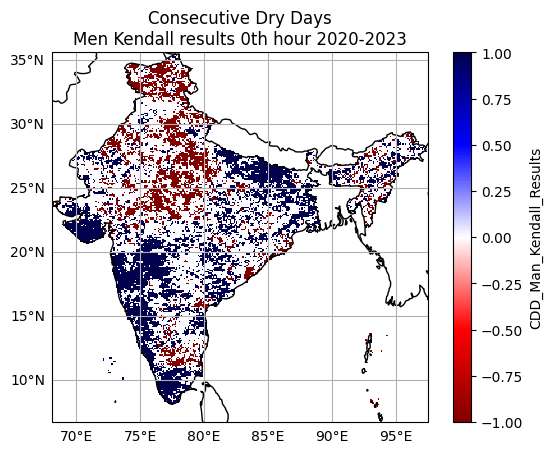

In [72]:
PlotGraph(plot_data)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


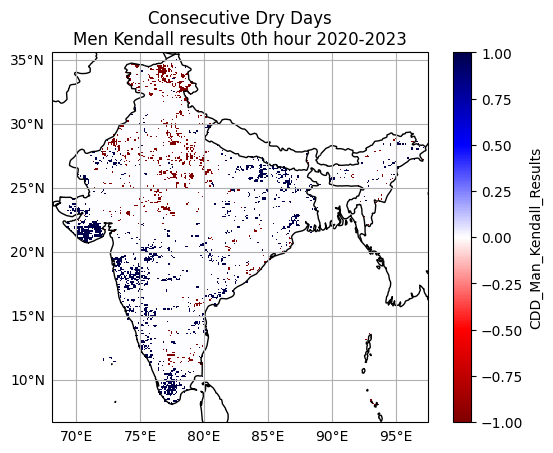

In [34]:
PlotGraph(plot_data)

In [35]:
plot_data,intercept_plot = SenSlope(cdd)

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:180: RuntimeWarning: All-NaN slice encountered
  slope = np.nanmedian(__sens_estimator(x))
/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:181: RuntimeWarning: All-NaN slice encountered
  intercept = np.nanmedian(x) - np.median(np.arange(n)[~np.isnan(x.flatten())]) * slope  # or median(x) - (n-1)/2 *slope
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


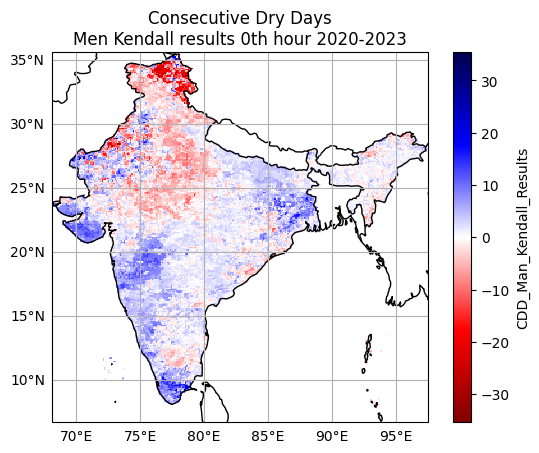

In [36]:
PlotGraph(plot_data)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


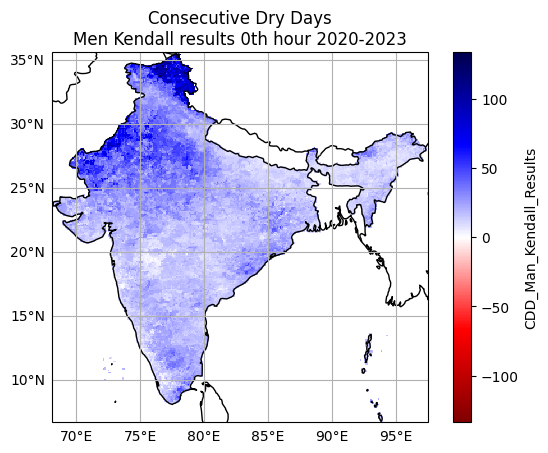

In [37]:
PlotGraph(intercept_plot)

## 3rd hour

In [38]:
cdd = LoadData('03')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Lib

In [43]:
plot_data = ManKendallTest(cdd)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


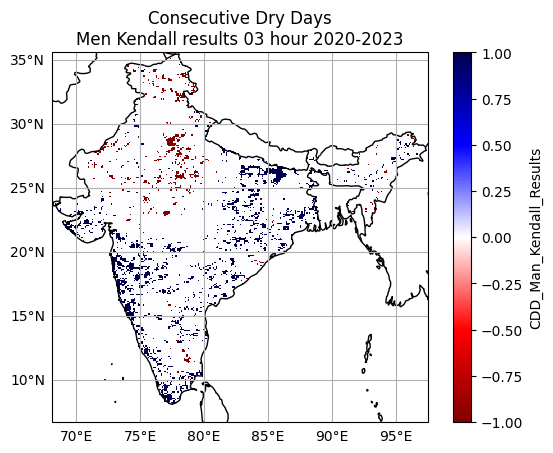

In [44]:
PlotGraph(plot_data,hour='03')

In [41]:
plot_data,intercept_plot = SenSlope(cdd)

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:180: RuntimeWarning: All-NaN slice encountered
  slope = np.nanmedian(__sens_estimator(x))
/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:181: RuntimeWarning: All-NaN slice encountered
  intercept = np.nanmedian(x) - np.median(np.arange(n)[~np.isnan(x.flatten())]) * slope  # or median(x) - (n-1)/2 *slope
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


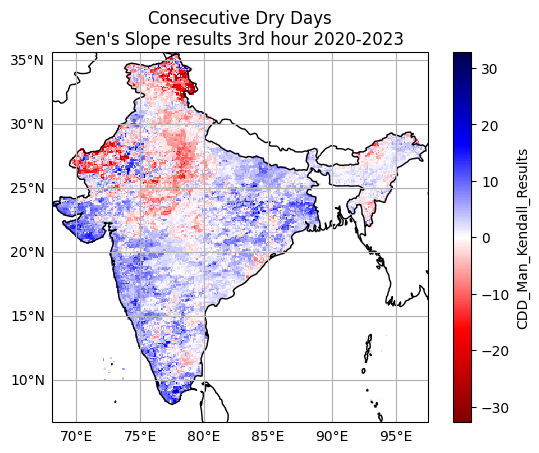

In [42]:
PlotGraph(plot_data,test='Sen\'s Slope',hour='3rd')

## 6th Hour

In [45]:
cdd = LoadData('06')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Lib

In [46]:
plot_data = ManKendallTest(cdd)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


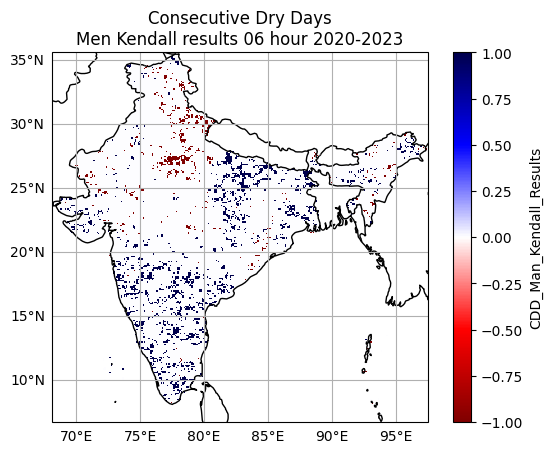

In [47]:
PlotGraph(plot_data,hour='06')

In [48]:
plot_data,intercept_plot = SenSlope(cdd)

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:180: RuntimeWarning: All-NaN slice encountered
  slope = np.nanmedian(__sens_estimator(x))
/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:181: RuntimeWarning: All-NaN slice encountered
  intercept = np.nanmedian(x) - np.median(np.arange(n)[~np.isnan(x.flatten())]) * slope  # or median(x) - (n-1)/2 *slope
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


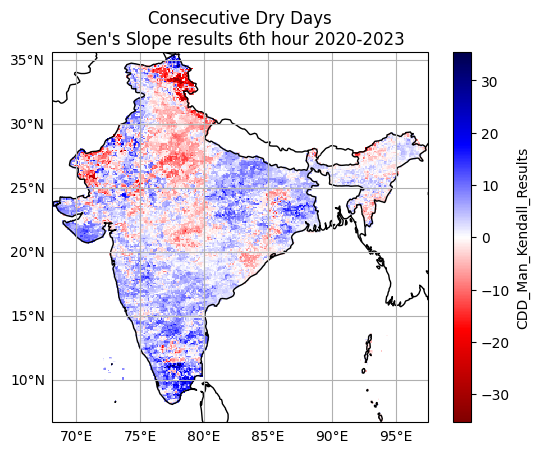

In [49]:
PlotGraph(plot_data,test="Sen\'s Slope",hour='6th')

## 9th Hour

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Lib

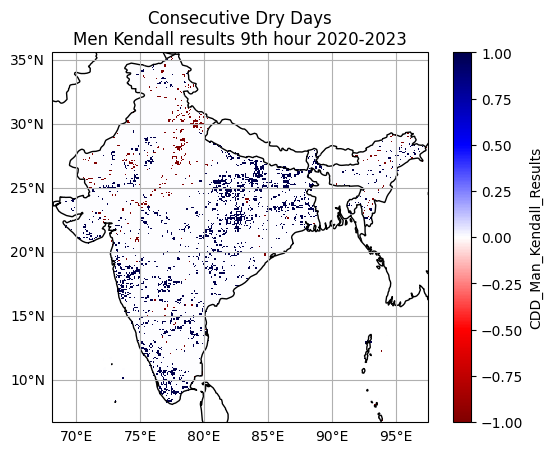

In [51]:
cdd = LoadData("09")
plot_data = ManKendallTest(cdd)
PlotGraph(plot_data,hour="9th")

In [52]:
plot_data,intercept_plot = SenSlope(cdd)

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:180: RuntimeWarning: All-NaN slice encountered
  slope = np.nanmedian(__sens_estimator(x))
/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:181: RuntimeWarning: All-NaN slice encountered
  intercept = np.nanmedian(x) - np.median(np.arange(n)[~np.isnan(x.flatten())]) * slope  # or median(x) - (n-1)/2 *slope
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


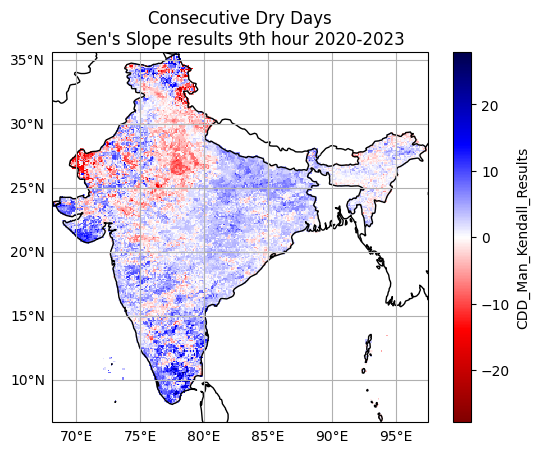

In [53]:
PlotGraph(plot_data,test="Sen\'s Slope",hour='9th')

## 12th Hour

In [54]:
cdd = LoadData('12')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Lib

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


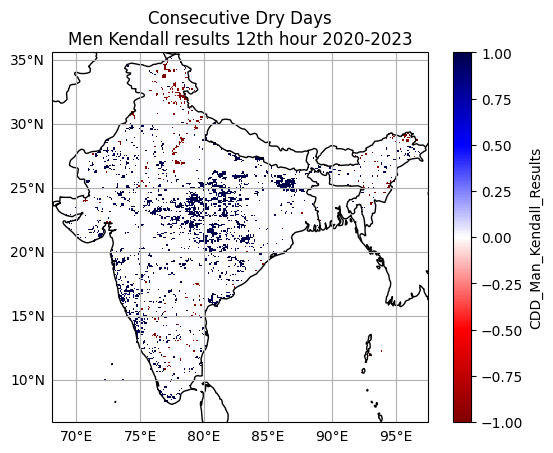

In [55]:
plot_data = ManKendallTest(cdd)
PlotGraph(plot_data,hour="12th")

In [57]:
plot_data,intercept_plot = SenSlope(cdd)

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:180: RuntimeWarning: All-NaN slice encountered
  slope = np.nanmedian(__sens_estimator(x))
/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:181: RuntimeWarning: All-NaN slice encountered
  intercept = np.nanmedian(x) - np.median(np.arange(n)[~np.isnan(x.flatten())]) * slope  # or median(x) - (n-1)/2 *slope
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


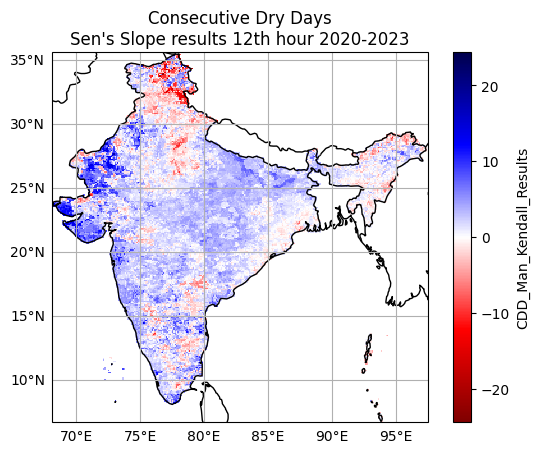

In [58]:
PlotGraph(plot_data,test='Sen\'s Slope',hour='12th')

## 15th Hour

In [59]:
cdd = LoadData('15')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Lib

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


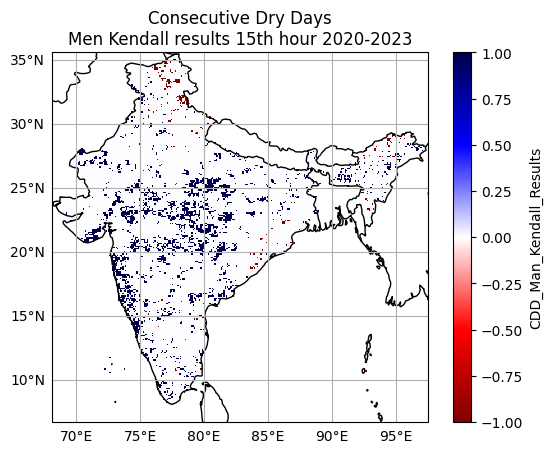

In [60]:
plot_data = ManKendallTest(cdd)
PlotGraph(plot_data,hour='15th')

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:180: RuntimeWarning: All-NaN slice encountered
  slope = np.nanmedian(__sens_estimator(x))
/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:181: RuntimeWarning: All-NaN slice encountered
  intercept = np.nanmedian(x) - np.median(np.arange(n)[~np.isnan(x.flatten())]) * slope  # or median(x) - (n-1)/2 *slope
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarni

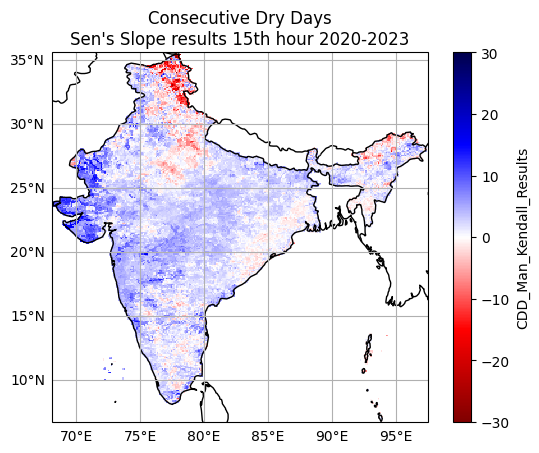

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


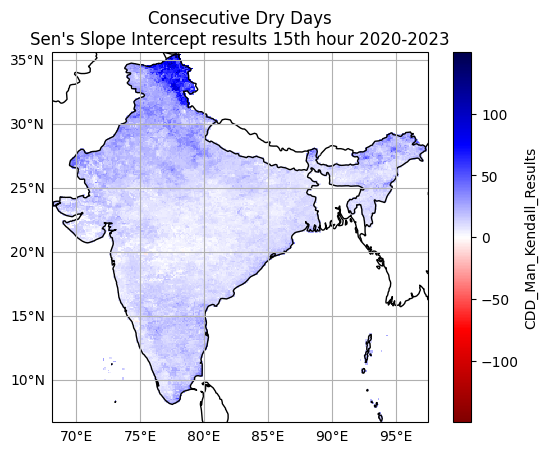

In [61]:
plot_data,intercept_plot = SenSlope(cdd)
PlotGraph(plot_data,test="Sen\'s Slope",hour="15th")
PlotGraph(intercept_plot,test="Sen\'s Slope Intercept",hour="15th")

## 18th Hour

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Lib

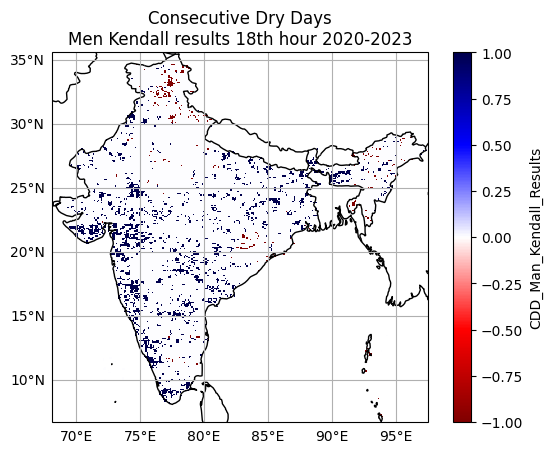

In [62]:
cdd = LoadData("18")
plot_data = ManKendallTest(cdd)
PlotGraph(plot_data,hour="18th")

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:180: RuntimeWarning: All-NaN slice encountered
  slope = np.nanmedian(__sens_estimator(x))
/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:181: RuntimeWarning: All-NaN slice encountered
  intercept = np.nanmedian(x) - np.median(np.arange(n)[~np.isnan(x.flatten())]) * slope  # or median(x) - (n-1)/2 *slope
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarni

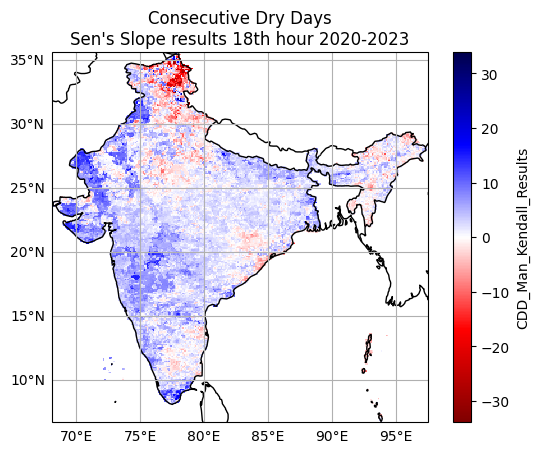

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


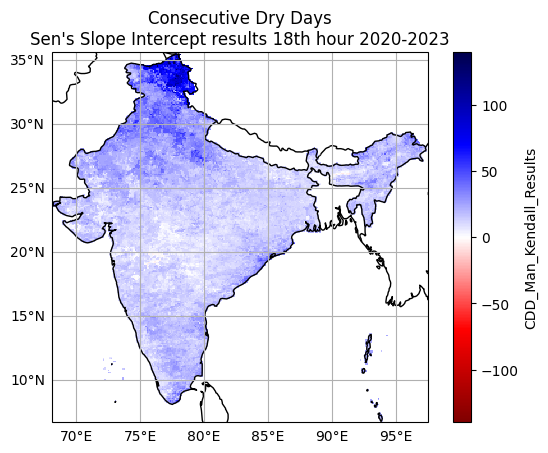

In [63]:
plot_data,intercept_plot = SenSlope(cdd)
PlotGraph(plot_data,test="Sen\'s Slope",hour="18th")
PlotGraph(intercept_plot,test="Sen\'s Slope Intercept",hour="18th")

## 21st Hour

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Lib

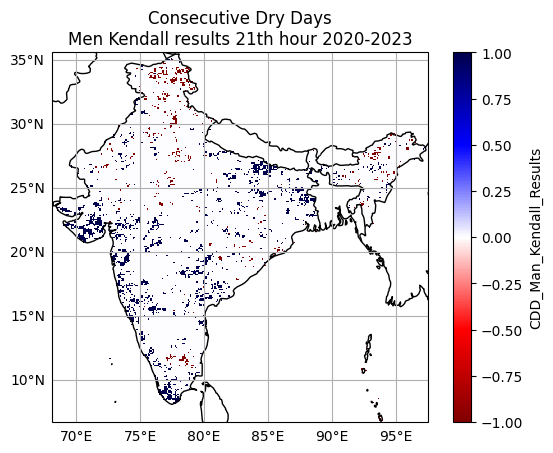

In [64]:
cdd = LoadData("21")
plot_data = ManKendallTest(cdd)
PlotGraph(plot_data,hour="21th")

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:180: RuntimeWarning: All-NaN slice encountered
  slope = np.nanmedian(__sens_estimator(x))
/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:181: RuntimeWarning: All-NaN slice encountered
  intercept = np.nanmedian(x) - np.median(np.arange(n)[~np.isnan(x.flatten())]) * slope  # or median(x) - (n-1)/2 *slope
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarni

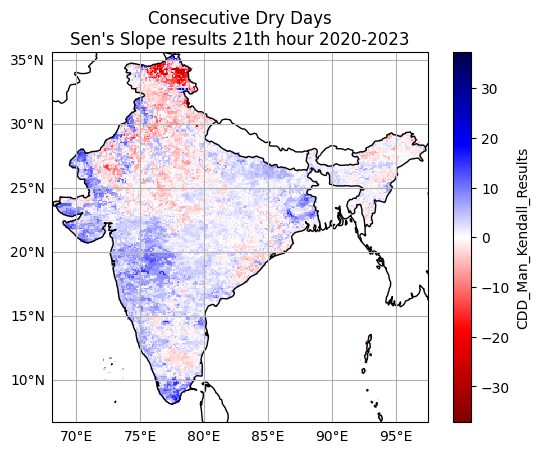

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


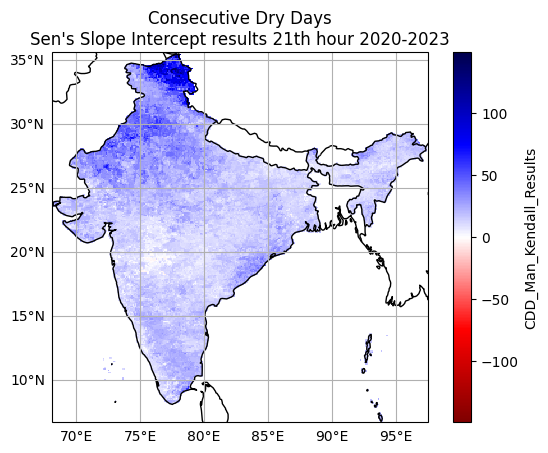

In [65]:
plot_data,intercept_plot = SenSlope(cdd)
PlotGraph(plot_data,test="Sen\'s Slope",hour="21th")
PlotGraph(intercept_plot,test="Sen\'s Slope Intercept",hour="21th")

In [12]:
x = [1,4,7,9,2,3,6,4,7,1,2,3,9,8]
slope,intercept = mk.sens_slope(x)
slope

0.2

In [10]:
mk.original_test(x)

Mann_Kendall_Test(trend='no trend', h=False, p=0.4392775389283372, z=0.7734137772264355, Tau=0.16483516483516483, s=15.0, var_s=327.6666666666667, slope=0.2, intercept=2.7)